<a href="https://colab.research.google.com/github/Philliec459/Open-Source-Petrophysics/blob/main/2_Read_LAS_Depth_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/HW-10.las'

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    !pip install lasio


# Reservoir Characterization Workflow: Read in LAS Well Log Data


We have used the new hierarchical carbonate reservoir benchmarking case study created by Costa Gomes J, Geiger S, Arnold D to be used for reservoir characterization, uncertainty quantification and history matching(1)

## Explore well log data using Andy McDonalds methods dicussed in his Petrophysical Python Series


1.  Costa Gomes J, Geiger S, Arnold D. The Design of an Open-Source Carbonate Reservoir Model. Petroleum Geoscience,
    https://doi.org/10.1144/petgeo2021-067



---

## Python Requirements:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio

## Uncomment the Costa HW Well that you want to evaluate:

In [4]:
#las = lasio.read("HW-3.las");elev_meas_ref = 160
#las = lasio.read("./data/HW-4.las");elev_meas_ref = 29
#las = lasio.read("./data/HW-5.las");elev_meas_ref = 36
#las = lasio.read("./data/HW-6.las");elev_meas_ref = 49
#las = lasio.read("./data/HW-7.las");elev_meas_ref = 367
#las = lasio.read("./data/HW-8.las");elev_meas_ref = 416
#las = lasio.read("./data/HW-9.las");elev_meas_ref = 492
las = lasio.read("HW-10.las");elev_meas_ref = 397
#las = lasio.read("./data/HW-24.las");elev_meas_ref = 426
#las = lasio.read("./data/HW-25.las");elev_meas_ref = 386
#las = lasio.read("./data/HW-26.las");elev_meas_ref = 375
#las = lasio.read("./data/HW-27.las");elev_meas_ref = 453
#las = lasio.read("./data/HW-28.las");elev_meas_ref = 430
#las = lasio.read("./data/HW-29.las");elev_meas_ref = 466
#las = lasio.read("./data/HW-30.las");elev_meas_ref = 590
#las = lasio.read("./data/HW-31.las");elev_meas_ref = 417
#las = lasio.read("./data/HW-32.las");elev_meas_ref = 441


In [5]:
df_log = las.df()

df_log.tail(10)

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8625.5,18.52,2.74,0.02,NaN,0.0,27.22,NaN,NaN,NaN,NaN
8626.0,22.32,2.73,0.02,NaN,0.0,26.27,NaN,NaN,NaN,NaN
8626.5,24.29,2.72,0.02,NaN,0.0,25.27,NaN,NaN,NaN,NaN
8627.0,23.68,2.72,0.03,NaN,0.0,24.01,NaN,NaN,NaN,NaN
8627.5,22.48,2.72,0.03,NaN,0.0,22.56,NaN,NaN,NaN,NaN
8628.0,23.40,2.73,0.04,NaN,0.0,21.26,NaN,NaN,NaN,NaN
8628.5,27.49,2.74,0.04,NaN,0.0,20.30,NaN,NaN,NaN,NaN
8629.0,32.21,2.74,0.04,NaN,0.0,20.14,NaN,NaN,NaN,NaN
8629.5,33.37,2.73,0.04,NaN,0.0,20.94,NaN,NaN,NaN,NaN


# Visualising Data Extent (from Andy McDonald):

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [6]:
well_nan = df_log.notnull() * 1

In [7]:
well_nan.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8440.0,1,1,1,0,1,1,0,0,0,0
8440.5,1,1,1,0,1,1,0,0,0,0
8441.0,1,1,1,0,1,1,0,0,0,0
8441.5,1,1,1,0,1,1,0,0,0,0
8442.0,1,1,1,0,1,1,0,0,0,0


/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_5695/1491711593.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1)


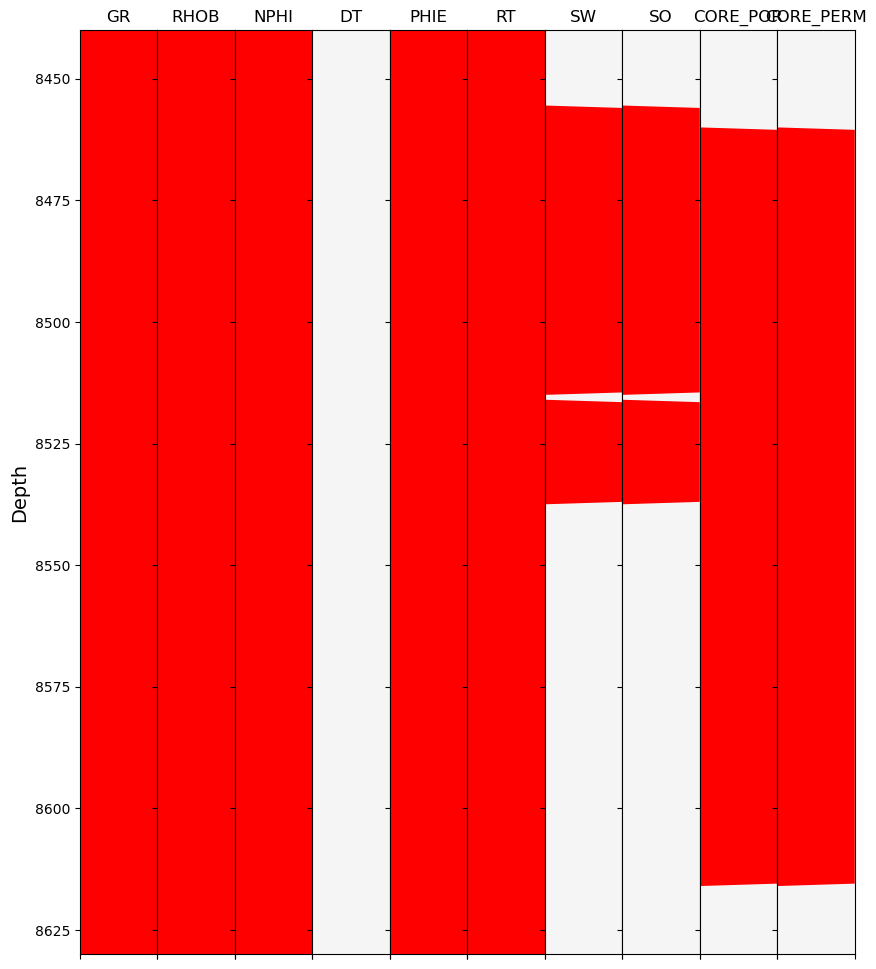

In [8]:
fig = plt.subplots(figsize=(10,12))

#Set up the plot axes
ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,10) , (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,10) , (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,10) , (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,10) , (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,10) , (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,10) , (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,10) , (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,10) , (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1)



columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    #ax.set_ylim(3000, 0)
    ax.set_ylim(max(las["DEPT"]),min(las["DEPT"]))
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

# Depth Plot:

In [9]:
df_log['DEPT']=df_log.index

In [10]:
# Create the TRIPLE COMBO figure and subplots
def triple_combo_plot(top_depth,bottom_depth):

    logs = df_log[(df_log.DEPT >= top_depth) & (df_log.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10), sharey=True)
    fig.suptitle("Triple Combo: Well Composite Plot", color='blue' , fontsize=18)
    fig.subplots_adjust(top=0.8,wspace=0.1)

    # General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=1.0, color='blue')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center', color = 'blue')


    #1st track: GR, CALI, SP track
    ax01=ax[0].twiny()
    ax01.set_xlim(0,150)
    ax01.plot(logs.GR, logs.DEPT, label='GR[api]', color='green', linewidth=2.0)
    ax01.spines['top'].set_position(('outward', 0))
    ax01.set_xlabel('GR[api]',color='green')
    ax01.tick_params(axis='x', colors='green')


    # 2nd track: Resistivities
    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,2000)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward', 0))
    ax11.set_xlabel('Rt[ohmm]', color='black')
    ax11.plot(logs.RT, logs.DEPT, '--', label='Rt[ohmm]', color='black', linewidth=3.0)
    ax11.tick_params(axis='x', colors='black')

    # 2nd track: Permeability
    ax12=ax[1].twiny()
    ax12.set_xlim(0.2,2000)
    ax12.set_xscale('log')
    ax12.grid(True)
    ax12.spines['top'].set_position(('outward', 40))
    ax12.set_xlabel('Core Perm [mD]', color='red')
    ax12.semilogx(df_log['CORE_PERM'], logs.DEPT ,'rd', lw=1, label= 'Core Perm')
    ax12.tick_params(axis='x', colors='red')

    

    #3rd track: DT, RHOB and NPHI track
    '''
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(115,36)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue',linewidth=1.0)
    ax21.set_xlabel('DT[us/ft]', color='blue')
    ax21.tick_params(axis='x', colors='blue')
    '''

    
    ax22=ax[2].twiny()
    ax22.set_xlim(0.45,-0.15)
    ax22.plot(logs.NPHI, logs.DEPT, '--', label='NPHI[v/v]', color='green',linewidth=2.0)
    ax22.spines['top'].set_position(('outward',0))
    ax22.set_xlabel('NPHI[v/v]', color='green')
    ax22.tick_params(axis='x', colors='green')

    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='k', linewidth=2.0)
    ax23.spines['top'].set_position(('outward',40))
    ax23.set_xlabel('RHOB[g/cc]',color='k')
    ax23.tick_params(axis='x', colors='k')

    ax24=ax[2].twiny()
    ax24.set_xlim(45,-15)
    ax24.plot(logs.CORE_POR, logs.DEPT, 'rd', label='Core Por[%]', color='red',linewidth=1.0)
    ax24.spines['top'].set_position(('outward',80))
    ax24.set_xlabel('Core Por[%]', color='red')
    ax24.tick_params(axis='x', colors='red')
    

    return

### Add Formation Tops:

In [11]:
"""
===============================================================================
 === 1. Add formation tops & depths

===============================================================================
"""

tops        = ('Top D'      ,     'Base D'   , 'TD' )
tops_depths = (     7805    ,     7995       , 8020 )


/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_5695/3568365705.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rd" (-> color='r'). The keyword argument will take precedence.
  ax24.plot(logs.CORE_POR, logs.DEPT, 'rd', label='Core Por[%]', color='red',linewidth=1.0)


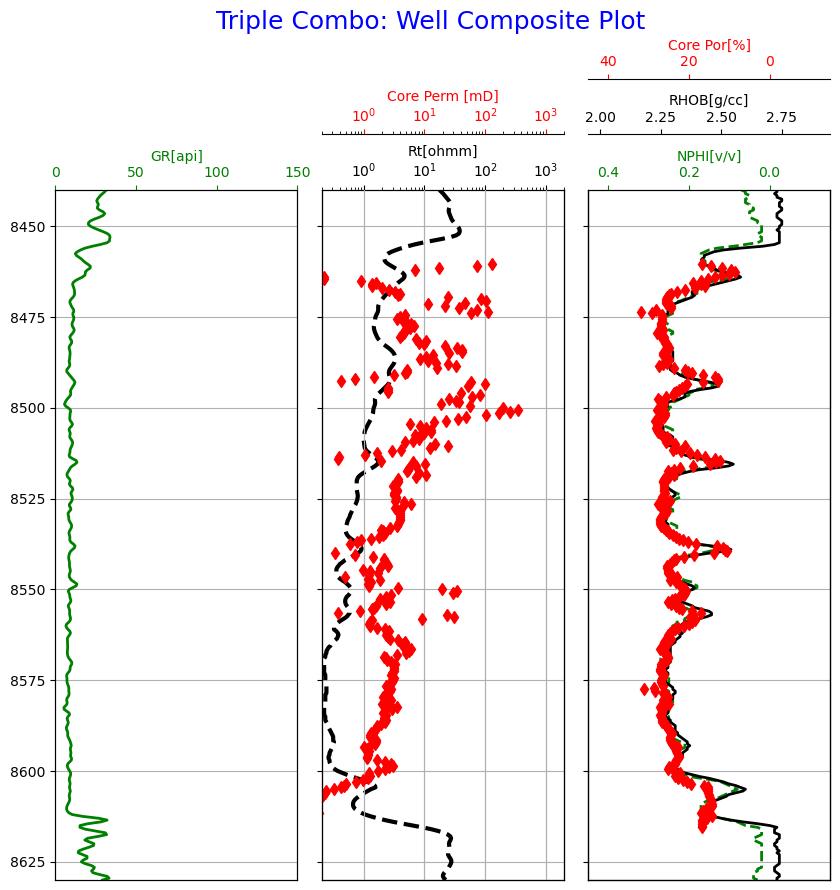

In [12]:
# =============================================================================
#      Display the logs for the entire well
# =============================================================================

triple_combo_plot(df_log.DEPT.min(),df_log.DEPT.max())